<a href="https://colab.research.google.com/github/arssite/GroQGemma/blob/main/1stTry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install requests beautifulsoup4 pandas scikit-learn tensorflow
!pip install transformers
!pip install selenium
!apt-get update
!apt install -y chromium-chromedriver


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,160 kB]
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:11 https://r2u.stat.illinois.ed

In [2]:
import requests
from bs4 import BeautifulSoup

# Function to get job listings from a company's career page
def get_job_listings(company_name):
    # Construct the search URL based on company name (this example uses Indeed)
    search_url = f"https://www.indeed.com/jobs?q={company_name}"

    # Send request to the page
    response = requests.get(search_url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract job listings (you'll need to inspect the website to find the correct class)
    jobs = []
    for job_card in soup.find_all('div', class_='jobsearch-SerpJobCard'):
        title = job_card.find('h2', class_='title').text.strip()
        company = job_card.find('span', class_='company').text.strip()
        summary = job_card.find('div', class_='summary').text.strip()
        jobs.append({'title': title, 'company': company, 'summary': summary})

    return jobs

# Test the function
company_name = "Google"
jobs = get_job_listings(company_name)
for job in jobs:
    print(job)


<ipython-input-3-f75954ec47ab>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = {'Month': pd.date_range(start='1/2020', periods=24, freq='M'),


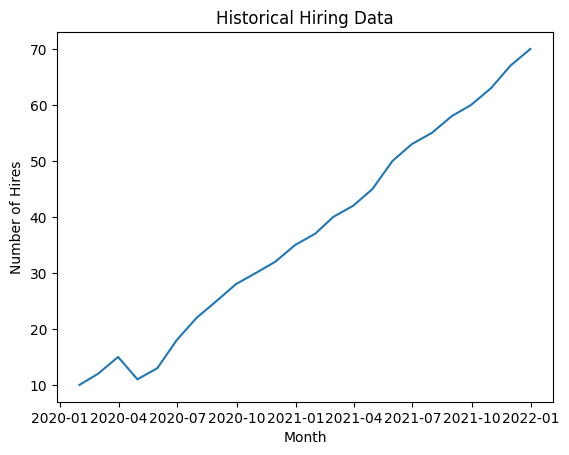

24     72.664803
25     75.326788
26     77.985957
27     80.642313
28     83.295860
29     85.946599
30     88.594535
31     91.239670
32     93.882007
33     96.521549
34     99.158299
35    101.792261
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Example: historical hiring data (replace with actual data)
data = {'Month': pd.date_range(start='1/2020', periods=24, freq='M'),
        'Hires': [10, 12, 15, 11, 13, 18, 22, 25, 28, 30, 32, 35, 37, 40, 42, 45, 50, 53, 55, 58, 60, 63, 67, 70]}
df = pd.DataFrame(data)

# Plot the hiring trend
plt.plot(df['Month'], df['Hires'])
plt.title("Historical Hiring Data")
plt.xlabel("Month")
plt.ylabel("Number of Hires")
plt.show()

# Create and fit the ARIMA model
model = ARIMA(df['Hires'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast future hiring trends
forecast = model_fit.forecast(steps=12)
print(forecast)


In [4]:
from transformers import pipeline

# Load pre-trained BERT for named entity recognition (NER)
nlp = pipeline('ner')

# Example: analyzing a company blog post
text = "Google is working on AI-powered voice recognition software to improve user experience in Android apps."

# Extract entities
entities = nlp(text)
print(entities)


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'entity': 'I-ORG', 'score': 0.99895704, 'index': 1, 'word': 'Google', 'start': 0, 'end': 6}, {'entity': 'I-MISC', 'score': 0.90209085, 'index': 5, 'word': 'AI', 'start': 21, 'end': 23}, {'entity': 'I-MISC', 'score': 0.9815186, 'index': 16, 'word': 'Android', 'start': 89, 'end': 96}]


In [5]:
import requests
from bs4 import BeautifulSoup

# Function to scrape job openings from LinkedIn (or other job boards)
def scrape_job_openings(company):
    url = f"https://www.linkedin.com/jobs/search/?f_C={company}"  # LinkedIn Jobs URL for the company
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    jobs = []
    for job_card in soup.find_all('div', class_='base-card__full-link'):
        title = job_card.find('h3').text.strip()
        location = job_card.find('span', class_='job-result-card__location').text.strip()
        jobs.append({'title': title, 'location': location})

    return jobs

# Example usage
company = "Microsoft"
job_listings = scrape_job_openings(company)
for job in job_listings:
    print(job)


In [6]:
import sqlite3

# Connect to SQLite database (it creates the DB if it doesn't exist)
conn = sqlite3.connect('job_openings.db')
cursor = conn.cursor()

# Create table for job listings
cursor.execute('''
CREATE TABLE IF NOT EXISTS job_openings (
    id INTEGER PRIMARY KEY,
    company TEXT,
    title TEXT,
    location TEXT,
    date_posted TEXT
)
''')

# Insert job listings into the table
def insert_job_opening(company, title, location, date_posted):
    cursor.execute('''
    INSERT INTO job_openings (company, title, location, date_posted)
    VALUES (?, ?, ?, ?)
    ''', (company, title, location, date_posted))
    conn.commit()

# Example insertion
insert_job_opening('Google', 'Software Engineer', 'California, USA', '2024-10-14')

# Query the database
cursor.execute('SELECT * FROM job_openings')
rows = cursor.fetchall()
for row in rows:
    print(row)


(1, 'Google', 'Software Engineer', 'California, USA', '2024-10-14')


In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generating sample data for demonstration (replace with real data)
data = np.array([10, 12, 15, 18, 22, 25, 28, 30, 32, 35, 37, 40, 45, 50, 53, 55, 58, 60])
data = data.reshape(-1, 1)

# Prepare data for LSTM
def prepare_data(series, n_steps):
    X, y = [], []
    for i in range(len(series)):
        end_ix = i + n_steps
        if end_ix > len(series)-1:
            break
        seq_x, seq_y = series[i:end_ix], series[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 3
X, y = prepare_data(data, n_steps)

# Define the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X, y, epochs=200, verbose=0)

# Demonstrate prediction
x_input = np.array([50, 53, 55]).reshape((1, n_steps, 1))
yhat = model.predict(x_input, verbose=0)
print("Predicted next hire count:", yhat)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Predicted next hire count: [[59.179504]]


In [8]:
from transformers import pipeline

# Load pre-trained BERT model for NER (named entity recognition)
nlp = pipeline('ner')

# Sample text from a company report
text = """
Amazon is expanding its cloud computing services to new industries, focusing on AI and machine learning.
Their latest project aims to optimize logistics with advanced deep learning models.
"""
# Extract entities
entities = nlp(text)
for entity in entities:
    print(f"Entity: {entity['word']}, Label: {entity['entity']}")


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is

Entity: Amazon, Label: I-ORG


In [9]:
from flask import Flask, render_template
import sqlite3

app = Flask(__name__)

@app.route('/')
def home():
    conn = sqlite3.connect('job_openings.db')
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM job_openings')
    jobs = cursor.fetchall()
    return render_template('home.html', jobs=jobs)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [12]:
!ngrok authtoken 2meNKMDKV8vR04iIzx6dZIaaH4C_4bEvXw6McM3iAan6Bvv2h


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install flask
!pip install pyngrok

from flask import Flask, render_template
from pyngrok import ngrok
import sqlite3

# Write the HTML template string to a file in the "templates" directory

# Create templates folder and save the HTML template


# Initialize Flask app
app = Flask(__name__)

# Route for displaying job openings
@app.route('/')
def home():
    # Connect to the SQLite database (replace with your database name)
    conn = sqlite3.connect('job_openings.db')
    cursor = conn.cursor()

    # Fetch job openings
    cursor.execute('SELECT * FROM job_openings')
    jobs = cursor.fetchall()

    # Render the HTML page and pass job data to the template
    return render_template('home.html', jobs=jobs)

# Run the app using ngrok
if __name__ == '__main__':
    # Setup ngrok tunnel
    url = ngrok.connect(5000)
    print('Public URL:', url)

    # Start Flask app
    app.run()



Public URL: NgrokTunnel: "https://9cba-34-125-124-31.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [14/Oct/2024 14:58:59] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Oct/2024 14:59:00] "GET /favicon.ico HTTP/1.1" 404 -
